<a href="https://colab.research.google.com/github/debtavares/projeto-pam/blob/main/Problema_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problema 02

Fazer a análise do dataset do Titanic. Limpeza, Preparação e Análise Exploratória dos Dados(não é necessário fazer previsões (modelos), basta analisar e organizar o dataset) usando Jupyter Notebook.

###Aluna: Débora Maria

##Comentários
**Descrição do dataset**<br>
PassengerId	= A unique ID to each Passenger; 1-891<br>
Survived	  = A boolean variable; 1 - Survived, 0 - Dead <br>
Pclass	    = Ticket Class; 1 - 1st, 2 - 2nd, 3 - 3rd class <br>
Name	      = Passenger Name <br>
Sex	        = Sex of Passenger <br>
Age	        = Age in Years <br>
SibSp	      = Number of Siblings / Spouses Aboard <br>
Parch	      = Number of parents / children aboard the titanic <br>
Ticket	    = Ticket number <br>
Fare	      = Passenger Fare <br>
Cabin	      = Cabin number <br>
Embarked	  = Port of Embarkation; C - Cherbourg, Q - Queenstown, S - Southampton <br><br>

**Considerações sobre as variáveis** <br>
Pclass <br>
1st = Superior
2nd = Meio
3rd = Inferior

SibSp <br>
Sibling = irmão, irmã <br>
Spouse = marido, esposa <br>

Parch <br>
Parent = pai, mãe <br>
Child = filhos <br>
Algumas criaças viajaram sozinhas com babá, neste caso parch=0 

#Carregando os dados

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ler arquivo
file_path = "titanic-data.csv"
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explorando os dados

In [3]:
# Informações dos dados
# Conseguimos visualizar a quantidade total de dados (891) e os dados faltantes (idade possuir só 714 de 891).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Total, média, valores mínimos e máximos 
# Análise de possíveis outliers. Em idade, o mínimo é 0.4 e o máximo 80.
# A média de sobreviventes é de 38%
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Valores faltantes
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Colunas
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [7]:
# Deletando o PassengerId por não contribuir na probabilidade ou não de sobreviventes
df = df.drop(['PassengerId'], axis=1)

In [26]:
# Media da idade
df['Age'].mean()

29.69911764705882

In [ ]:
# mediana da idade
df['age'].median()

##Coluna Survived

In [8]:
# Quantidade de valores existente 
df['Survived'].nunique()

2

In [9]:
# Valores existentes 
df['Survived'].unique()

array([0, 1])

In [10]:
# Quantidade de sobreviventes (1) e não sobreviventes (0)
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

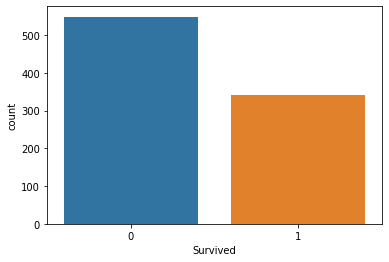

In [11]:
# Representação gráfica da quantidade de sobreviventes
sns.countplot(data = df, x = 'Survived')

Quantidade de valores existente: 2

Os valores existentes são: [0 1]

Quantidade por opção: 0    549
1    342
Name: Survived, dtype: int64


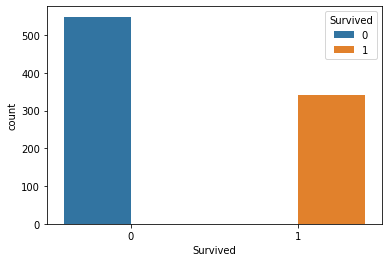

In [12]:
# funcao que tem como base a quantidade de sobreviventes e compacta as análises feitas anteriormente

def titanic_s(data, column, count = True):
  print(f"Quantidade de valores existente: {data[column].nunique()}")
  print(f"\nOs valores existentes são: {data[column].unique()}")
  print(f"\nQuantidade por opção: {data[column].value_counts()}")

  if count == True:
    sns.countplot(data = data, x = column, hue = 'Survived')

titanic_s(df, 'Survived')

##Coluna Pclass

Quantidade de valores existente: 3

Os valores existentes são: [3 1 2]

Quantidade por opção: 3    491
1    216
2    184
Name: Pclass, dtype: int64


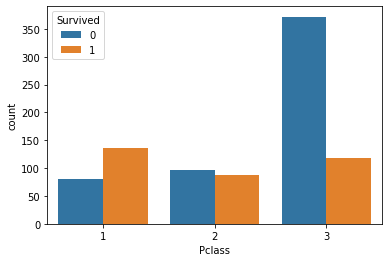

In [15]:
# Análise relacionada a coluna Pclass
# A quantidade de não sobreviventes foi maior na 3ª classe
titanic_s(df, 'Pclass')

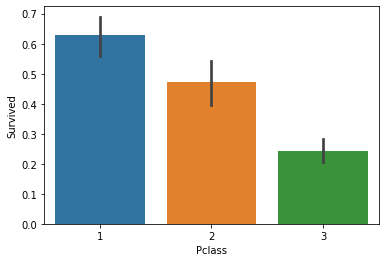

In [16]:
# Podemos ver que a classe é um fator que contribuio para a sobrevivência
sns.barplot(x='Pclass', y='Survived', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


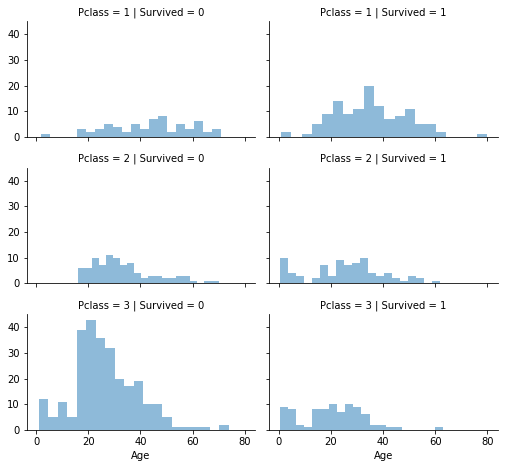

In [17]:
# Comparação gráfica da quantidade de não sobreviventes (0) e sobreviventes (1) em cada classe 
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
# Passageiros da primeira classe possuem mais chance de sobreviverem
# Que as classes mais baixas

##Coluna Sex

In [19]:
# Coloca 0 para homem e 1 para mulher
df['Sex'] = df['Sex'].replace(['male', 'female'], [0,1])

Quantidade de valores existente: 2

Os valores existentes são: [0 1]

Quantidade por opção: 0    577
1    314
Name: Sex, dtype: int64


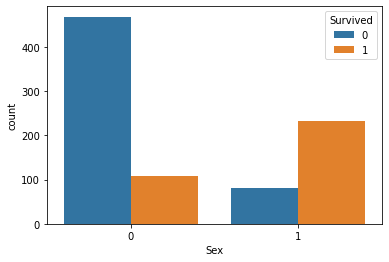

In [20]:
titanic_s(df, 'Sex')

# Mostra que em sexo há 2 valores, homem e mulher
# Onde 577 são homens e 314 mulheres
# Podemos ver no gráfico também que a quantidade de homens que sobreviveram
# Foi um pouco acima de 100, já a de mulheres sobreviventes acima de 200 

In [36]:
titanic_male_female=df.pivot_table('Survived','Sex',aggfunc='sum')
titanic_male_female

,Survived
Sex,
0,109
1,233


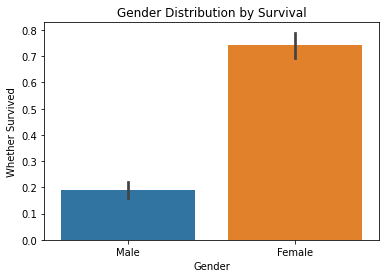

In [38]:
p= sns.barplot(x="Sex", y="Survived", data=df)
p.set(title = 'Gender Distribution by Survival', 
        xlabel = 'Gender', 
        ylabel = 'Whether Survived', 
        xticklabels = ['Male', 'Female']);
plt.show()

# Quase 80% das mulheres sobreviveram 
# Menos de 20% dos homens sobreviveram
# Mulheres possuem maiores chances de sobreviver

##Coluna Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of passengers')

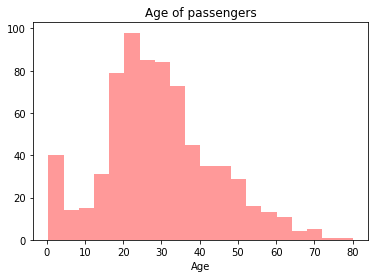

In [31]:
sns.distplot(df['Age'],color='red',kde=False)
plt.xlabel('Age')
plt.title('Age of passengers')

# A maioria das idades dos passageiros estão entre 20 e 40 anos

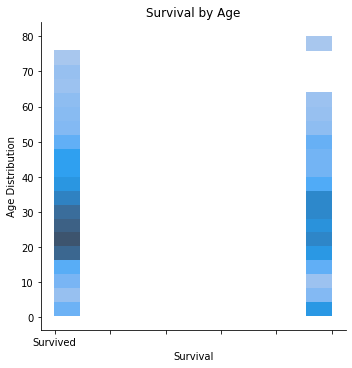

In [41]:
p = sns.displot(data = df, x = 'Survived', y = 'Age')
p.set(title = 'Survival by Age', 
        xlabel = 'Survival', 
        ylabel = 'Age Distribution', 
        xticklabels = ['Died', 'Survived']);
plt.show()

In [ ]:
# A maior quantidade de sobreviventes está entre 20 e 40